# Schema spettrometro (notebook Python)

Sistema da risolvere:

$\left\{ \begin{align*}   &n_1 \sin\left( {\alpha \over 2} \right)
  = \sin\left( {{\theta_1-\theta_0+\alpha} \over 2} \right)\\
   &n_2 \sin\left( {\alpha \over 2} \right)
  = \sin\left( {{\theta_2-\theta_0+\alpha} \over 2} \right)\\
  &n_1 = A + {B\over \lambda^2_1}\\
  &n_2 = A + {B\over \lambda^2_2}\\
  \end{align*}
 \right.$

Import dei moduli rilevanti

In [30]:
import math
import ROOT
import time

Parametri dello spettrometro

In [31]:
alpha   = math.pi/3
lambda1 = 579.1e-9
lambda2 = 404.7e-9
th0     = 1.5701
th1     = 2.6958
th2     = 2.7904
eth     = 0.0005

Funzione che, dati gli angoli $\theta_0$, $\theta_1$ e $\theta_2$, calcola A e B

In [37]:
def computeAB(th_0,th_1,th_2):
    def n_i(th_i, th_0):
        return math.sin((th_i - th_0 + alpha)/2)/math.sin(alpha/2)
    A = (n_i(th_1, th_0)*lambda1**2 - n_i(th_2, th_0)*lambda2**2)/(lambda1**2 - lambda2**2)
    B = (n_i(th_1, th_0) - n_i(th_2, th_0))/(1/(lambda1**2) - 1/(lambda2**2))
    return A, B

In [33]:
computeAB(th0, th1, th2)[1]

1.3462137256845494e-14

Programma principale

In [34]:
eth_stat = eth/math.sqrt(3)
sigma = [0,0]
for i in range(2):
    f = computeAB(th0 , th1, th2)[i]
    sigma1 = computeAB(th0 + eth_stat, th1, th2)[i] - f
    sigma2 = computeAB(th0, th1 + eth_stat, th2)[i] - f
    sigma3 = computeAB(th0, th1, th2 + eth_stat)[i] - f
    sigma[i] = math.sqrt(sigma1**2 + sigma2**2 + sigma3**2)

print(sigma[0]) #errore A
print(sigma[1]) #errore B

# Assumendo errore gaussiano (eth/sqrt(3)) 
# a) calcolo dell'errore su A e su B tramite variazione delle funzione
# b) calcolo delle distribuzioni di A e B
#    dell'errore su A, B e della loro correlazione

# Ripetere punto b) nel caso in cui invece si assuma distribuzione uniforme con larghezza +/-eth


0.00032241944739836695
5.82744536953901e-17


Warning in <TROOT::Append>: Replacing existing TH1: histA (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histB (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histAB (Potential memory leak).


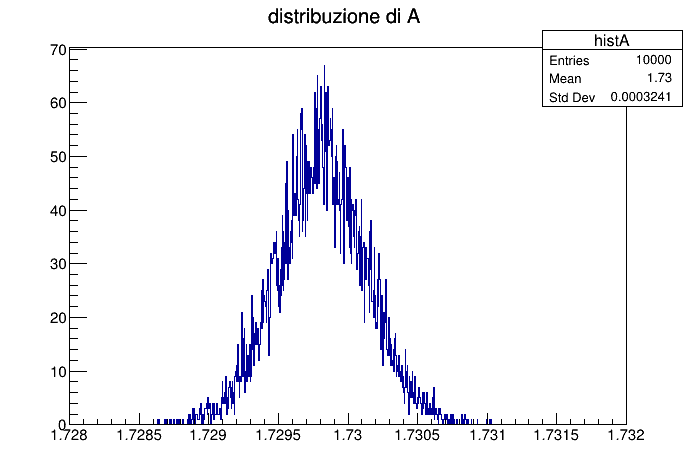

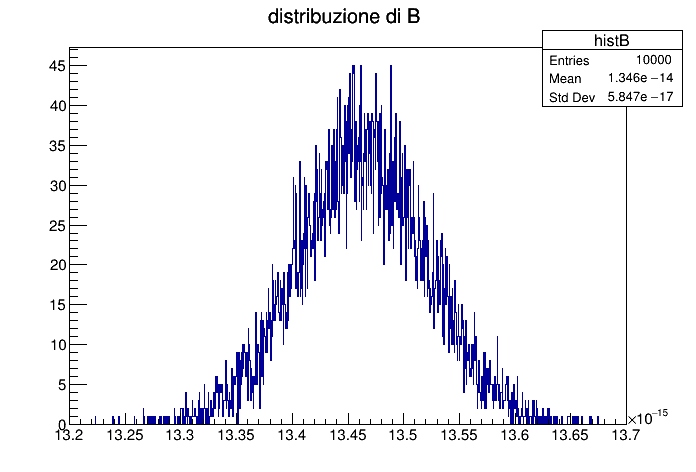

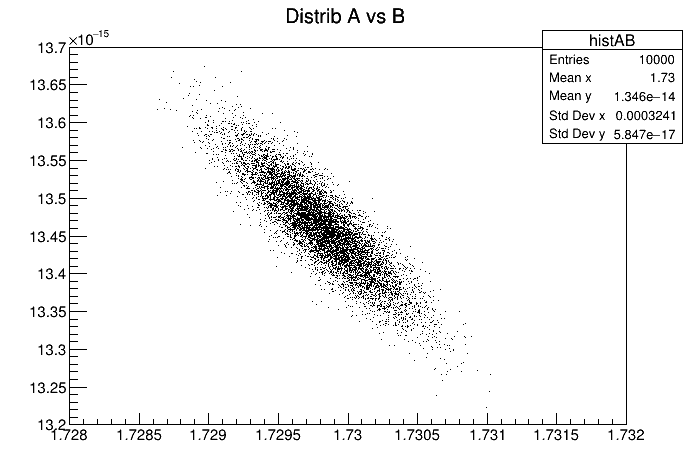

In [55]:
rnd=ROOT.TRandom3()
rnd.SetSeed(int(time.time()))

Ntot = 10000
hA = ROOT.TH1D("histA", "distribuzione di A", 1000, 1.728, 1.732)
hB = ROOT.TH1D("histB", "distribuzione di B", 1000, 13.2e-15, 13.7e-15)
hAB = ROOT.TH2D("histAB", "Distrib A vs B", 1000, 1.728, 1.732, 1000, 13.2e-15, 13.7e-15)

for i in range (Ntot):
    AB_gauss = computeAB(rnd.Gaus(th0, eth_stat), rnd.Gaus(th1, eth_stat), rnd.Gaus(th2, eth_stat))
    hA.Fill(AB_gauss[0])
    hB.Fill(AB_gauss[1])
    hAB.Fill(AB_gauss[0], AB_gauss[1])

cA=ROOT.TCanvas()
cB=ROOT.TCanvas()
cAB=ROOT.TCanvas()
cA.Draw()
cA.cd()
hA.Draw()

cB.Draw()
cB.cd()
hB.Draw()

cAB.Draw()
cAB.cd()
hAB.Draw()


In [45]:
hAB.GetCorrelationFactor()

-0.872929988450988

Warning in <TROOT::Append>: Replacing existing TH1: histA (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histB (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histAB (Potential memory leak).


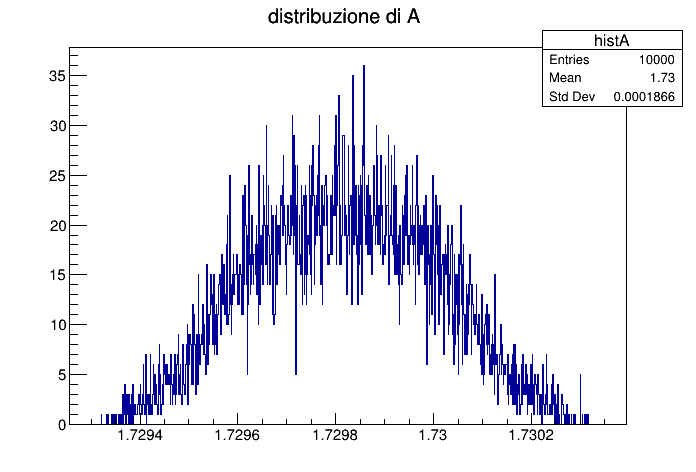

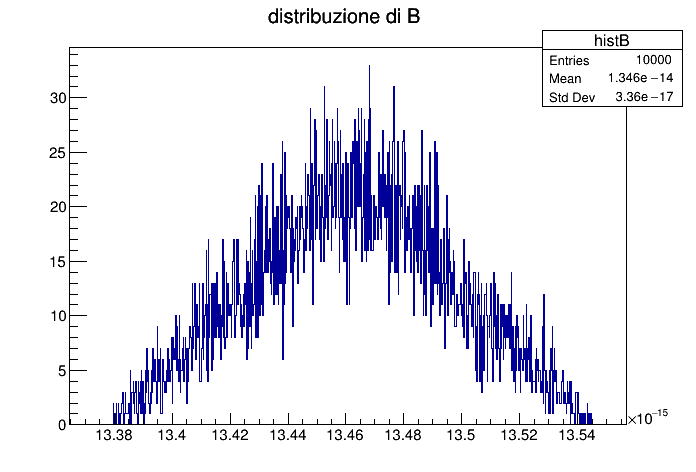

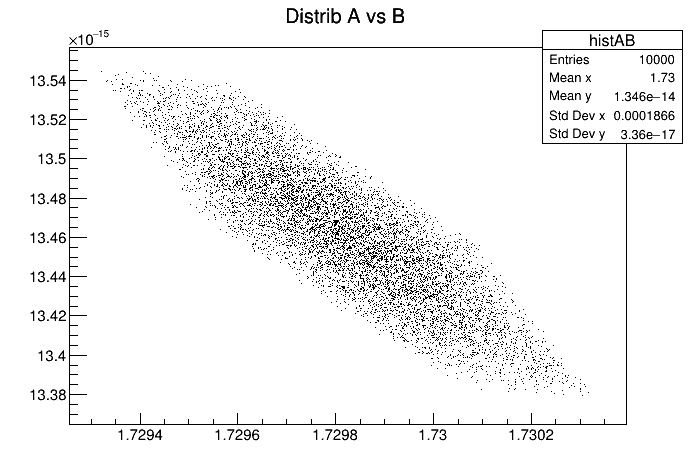

In [60]:
rnd=ROOT.TRandom3()
rnd.SetSeed(int(time.time()))

Ntot = 10000
hA = ROOT.TH1D("histA", "distribuzione di A", 1000, 0, 0)
hB = ROOT.TH1D("histB", "distribuzione di B", 1000, 0, 0)
hAB = ROOT.TH2D("histAB", "Distrib A vs B", 1000, 0,0, 1000, 0, 0)

for i in range (Ntot):
    AB_gauss = computeAB(rnd.Uniform(th0 - eth_stat, th0 + eth_stat), rnd.Uniform(th1 - eth_stat, th1 + eth_stat), rnd.Uniform(th2 - eth_stat, th2 + eth_stat))
    hA.Fill(AB_gauss[0])
    hB.Fill(AB_gauss[1])
    hAB.Fill(AB_gauss[0], AB_gauss[1])

cA=ROOT.TCanvas()
cB=ROOT.TCanvas()
cAB=ROOT.TCanvas()
cA.Draw()
cA.cd()
hA.Draw()

cB.Draw()
cB.cd()
hB.Draw()

cAB.Draw()
cAB.cd()
hAB.Draw()


In [59]:
hAB.GetCorrelationFactor()

-0.8727193697673868